In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_train = pd.read_csv("./train.csv")
titanic_test = pd.read_csv("./test.csv")

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
titanic_train_num = [column for column in titanic_train.columns if titanic_train[column].dtype != "O"]

In [12]:
titanic_train_num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
titanic_train_cat = [column for column in titanic_train.columns if titanic_train[column].dtype == "O"]

In [14]:
titanic_train_cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [15]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_missing = [column for column in titanic_train.columns if titanic_train[column].isnull().sum() > 0]

In [17]:
titanic_missing

['Age', 'Cabin', 'Embarked']

In [18]:
titanic_train.drop("Cabin",axis=1,inplace=True)

In [19]:
len(titanic_train[titanic_train["Embarked"].isnull()])/len(titanic_test)

0.004784688995215311

In [20]:
titanic_train.dropna(axis=0,subset=["Embarked"],inplace=True)

In [21]:
titanic_train.shape

(889, 11)

In [22]:
titanic_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q


In [23]:
titanic_train.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

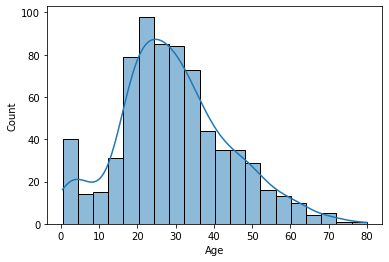

In [24]:
sns.histplot(titanic_train["Age"],kde=True)

In [25]:
def NumericalVsCategorical(Dataset,Col):
    Dataset_train_cat = [column for column in Dataset.columns if Dataset[column].dtype == "O"]
    print(Dataset_train_cat)
    for column in Dataset_train_cat:
        sns.boxplot(titanic_train[column],titanic_train[Col])
        plt.show()

['Sex', 'Embarked']


/home/unotag/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


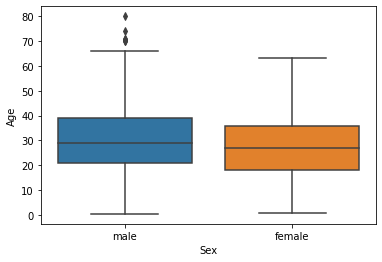

/home/unotag/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


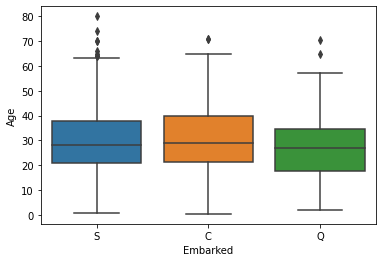

In [26]:
NumericalVsCategorical(titanic_train,"Age")

In [27]:
import warnings

warnings.filterwarnings("ignore")

In [28]:
titanic_train["Age"].min()

0.42

In [29]:
titanic_train["Age"].max()

80.0

<AxesSubplot:xlabel='Age'>

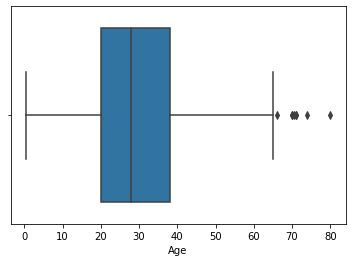

In [30]:
sns.boxplot(titanic_train["Age"])

In [31]:
titanic_train["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

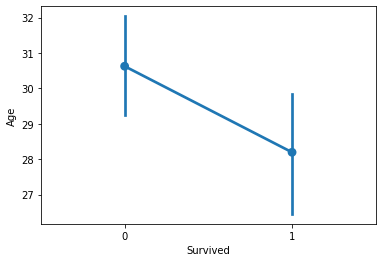

In [32]:
sns.pointplot(titanic_train["Survived"],titanic_train["Age"])

In [33]:
titanic_train[titanic_train["Survived"] == 0]["Age"].mean()

30.62617924528302

In [34]:
titanic_train[titanic_train["Survived"] == 1]["Age"].mean()

28.19329861111111

In [35]:
titanic_train[titanic_train["Survived"] == 0]["Age"].median()

28.0

In [36]:
titanic_train[titanic_train["Survived"] == 1]["Age"].median()

28.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

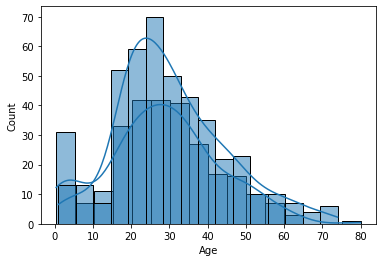

In [37]:
sns.histplot(titanic_train[titanic_train["Survived"] == 1]["Age"],kde=True)
sns.histplot(titanic_train[titanic_train["Survived"] == 0]["Age"],kde=True)

In [38]:
age = titanic_train.dropna().sample(titanic_train["Age"].isnull().sum(),random_state=0)["Age"]

In [39]:
age.reset_index().drop("index",axis=1,inplace=True)

In [40]:
index_null = titanic_train[titanic_train["Age"].isnull()].index

In [41]:
age

423    28.00
178    30.00
305     0.92
292    36.00
592    47.00
       ...  
539    22.00
267    25.00
503    37.00
100    28.00
268    58.00
Name: Age, Length: 177, dtype: float64

In [42]:
age.index = index_null

In [43]:
titanic_train["Age_fill"] = titanic_train["Age"]

In [44]:
titanic_train.loc[titanic_train["Age_fill"].isnull(),"Age_fill"] = age

In [45]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_fill      0
dtype: int64

In [46]:
age

5      28.00
17     30.00
19      0.92
26     36.00
28     47.00
       ...  
859    22.00
863    25.00
868    37.00
878    28.00
888    58.00
Name: Age, Length: 177, dtype: float64

In [47]:
titanic_train["Age_fill"].mean()

29.87608548931383

In [48]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_fill
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,27.0
887,1,1,female,19.0,0,0,30.0000,S,19.0
888,0,3,female,NaN,1,2,23.4500,S,58.0
889,1,1,male,26.0,0,0,30.0000,C,26.0


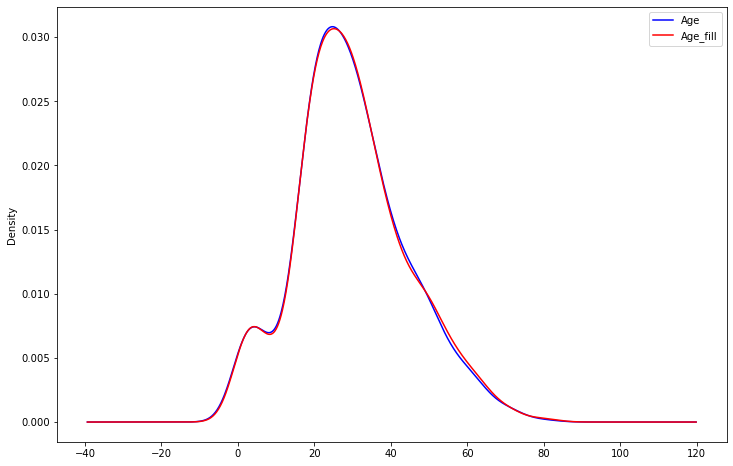

In [49]:
plt.figure(figsize=(12,8))
titanic_train.Age.plot(kind='kde',color='b')
titanic_train.Age_fill.plot(kind='kde',color='r')
plt.legend()

In [50]:
print(titanic_train["Age"].mean(),titanic_train["Age_fill"].mean())

29.64209269662921 29.87608548931383


In [52]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_fill      0
dtype: int64

In [54]:
titanic_train.drop("Age",axis=1,inplace=True)

In [55]:
titanic_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_fill
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27.0
887,1,1,female,0,0,30.0000,S,19.0
888,0,3,female,1,2,23.4500,S,58.0
889,1,1,male,0,0,30.0000,C,26.0
